<iframe src=https://api.bls.gov/publicAPI/v1/timeseries/data/CFU0000008000 width=10000 height=100></iframe>
<iframe src=https://data.bls.gov/registrationEngine/ width=10000 height=400></iframe>
<iframe src=https://www.bls.gov/help/hlpforma.htm#CX width=10000 height=400></iframe>
   footnotes period   periodName value  year
0       [{}]    Q04  4th Quarter   2.0  2016
1       [{}]    Q03  3rd Quarter   2.7  2016
2       [{}]    Q02  2nd Quarter   0.6  2016
3       [{}]    Q01  1st Quarter  -1.1  2016
4       [{}]    Q04  4th Quarter  -2.7  2015
5       [{}]    Q03  3rd Quarter   1.6  2015
6       [{}]    Q02  2nd Quarter   1.6  2015
7       [{}]    Q01  1st Quarter   2.4  2015
8       [{}]    Q04  4th Quarter  -1.9  2014
9       [{}]    Q03  3rd Quarter   3.7  2014
10      [{}]    Q02  2nd Quarter   2.2  2014
11      [{}]    Q01  1st Quarter  -3.3  2014
12      [{}]    Q04  4th Quarter   4.1  2013
13      [{}]    Q03  3rd Quarter   1.5  2013
14      [{}]    Q02  2nd Quarter  -0.1  2013


<function matplotlib.pyplot.show>

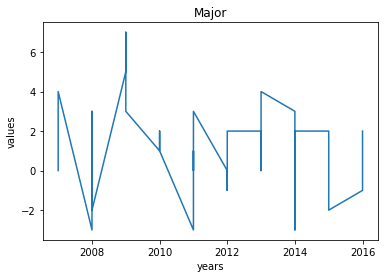

In [13]:
from IPython.display import HTML
import getpass
import requests
import json
import numpy as np
import pandas as pd
#import bokeh.plotting as bp
import matplotlib.pyplot as mp

def show_iframe(url, height=400, width=10000):
    display_string = '<iframe src={url} width={w} height={h}></iframe>'.format(url=url, w=width, h=height)
    print(display_string)
    return HTML(display_string)

show_iframe('https://api.bls.gov/publicAPI/v1/timeseries/data/CFU0000008000', height=100)

#get registration key
show_iframe('https://data.bls.gov/registrationEngine/')
reg_key= getpass.getpass('Enter Registration Key: ')

#define series identifier
show_iframe('https://www.bls.gov/help/hlpforma.htm#CX', height=400)
            
#make get request
'{a}_{b}'.format(a='c', b=1)

series = 'PRS84006092'

def capture_request(series, start, end, key=reg_key):
    url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'
    url += '?registrationkey={key}'.format(key=key)
    data = json.dumps({
        "seriesid": [series],
        "startyear": str(start),
        "endyear": str(end)
    })
    headers= {
    "Content-type": "application/json"
    }
    result = requests.post(url, data=data, headers=headers)
    return json.loads(result.text)

json_data = capture_request(series, 2007, 2016)

json_data

#convert to dataframe and plot
df_data = pd.DataFrame(json_data['Results']['series'][0]['data'])
print(df_data)

df_sub = df_data[['year', 'value']].astype(float).astype(int)
df_sub.set_index('year', inplace=True)
df_sub.sort_index(inplace=True)

df_sub

#df_sub.loc[2014:2015]

#bp.output_file('figs/bls_api_fig.html')
#fig = bp.figure(plot_width=500, plot_height=300)

#fig.line(df_sub.index, df_sub['value'], line_width=3, color='#890d13')

#fig.title.text = "Bla"
#fig.xaxis.axis_label = "Year"
#fig.yaxis.axis_label = "Health Expenditures"

#bp.save(fig)

#show_iframe('figs/bls_api_fig.html', width=550, height=350)

x = df_sub.index
y = df_sub['value']

mp.plot(x,y)
mp.title('Major')
mp.xlabel('years')
mp.ylabel('values')
mp.show